<a href="https://colab.research.google.com/github/kanishkkg/ampba_24_group18_term2/blob/main/ml_ul/GR_18_MLUL1_group18_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter notebook submission created by Group 18
* Kanishk Kumar Gupta - 12310008

## Part (2/2) - Product Clustering and Segementation

In [ ]:
Demo Cell

### Installing relevant libraries

In [148]:
import pandas as pd
import numpy as np
import string

!pip install scikit-learn --upgrade
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [105]:
url = 'https://raw.githubusercontent.com/kanishkkg/ampba_24_group18_term2/main/ml_ul/Champo%20Carpets%20V1.csv'

In [106]:
base_data = pd.read_csv(url)

In [107]:
base_data.head()

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


In [108]:
base_data.drop_duplicates(inplace=True)

### Product Segmentation

In [109]:
item_data = base_data.copy(deep=True)

In [7]:
# Checking if each item as a unique shape or not
agg_data = item_data.groupby('Item_Id').agg(
    unique_shapes=('ShapeName', 'nunique')
).reset_index()
agg_data[agg_data['unique_shapes'] != 1]

,Item_Id,unique_shapes


In [8]:
len(item_data['ShapeName'].value_counts())

5

In [9]:
item_data['price'] = item_data['Amount']/item_data['QtyRequired']

item_data[['Item_Id', 'price']]

agg_data = item_data.groupby('Item_Id').agg(
    min_price=('price', 'min'),
    max_price=('price', 'max'),
).reset_index()

agg_data[agg_data['min_price'] != agg_data['max_price']]

,Item_Id,min_price,max_price
10,11,71.25,195.93000
48,52,0.00,165.60000
49,55,80.00,160.00000
52,58,0.00,160.00000
56,64,80.00,160.00000
...,...,...,...
5809,45871,6.75,6.91875
5811,45873,6.75,6.91875
5814,45880,6.75,6.91875
5816,45882,6.75,6.91875


In [10]:
item_agg_data = item_data.groupby('Item_Id').agg(
    total_quantity=('QtyRequired','sum'),
    total_revenue=("Amount", "sum"),
    num_of_customers=("customer_country", "nunique"),
    average_quantity=("QtyRequired", 'mean'),
    total_area=("TotalArea", "sum"),
    average_area=("TotalArea", "mean")
).reset_index()

item_agg_data

,Item_Id,total_quantity,total_revenue,num_of_customers,average_quantity,total_area,average_area
0,1,2,12.00,1,2.0,6.0,6.00
1,2,2,18.00,1,2.0,9.0,9.00
2,3,7,378.00,1,3.5,108.0,54.00
3,4,9,641.25,1,4.5,142.5,71.25
4,5,22,2821.50,1,11.0,256.5,128.25
...,...,...,...,...,...,...,...
5870,46697,28,663.60,1,28.0,6.0,6.00
5871,46698,10,888.70,1,10.0,22.5,22.50
5872,46699,15,4740.00,1,15.0,80.0,80.00
5873,46700,7,2986.20,1,7.0,108.0,108.00


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(item_agg_data[['total_quantity', 'total_revenue', 'num_of_customers',
                                                      'average_quantity', 'total_area', 'average_area']])

<Figure size 1000x600 with 0 Axes>

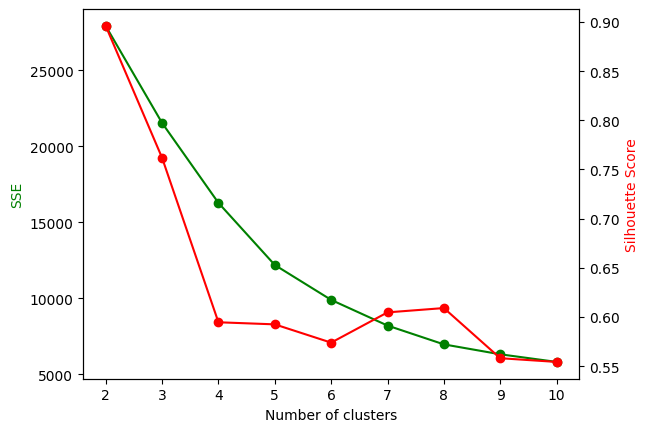

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'scaled_features' is the scaled version of item_agg_data

sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(2, 11), sse, 'go-')
ax2.plot(range(2, 11), silhouette_scores, 'ro-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='g')
ax2.set_ylabel('Silhouette Score', color='r')

plt.show()


In [13]:
from sklearn.cluster import KMeans

# Determine the number of clusters (this can be fine-tuned)
n_clusters = 8  # Example number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original data
item_agg_data['Cluster'] = clusters


In [14]:
# Analyzing each cluster
for i in range(n_clusters):
    cluster_data = item_agg_data[item_agg_data['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data.describe())



Cluster 0:
            Item_Id  total_quantity  total_revenue  num_of_customers  \
count    143.000000      143.000000     143.000000             143.0   
mean    6726.636364       69.818182   21502.954965               1.0   
std     7820.135098       97.194566   26289.072243               0.0   
min       80.000000        1.000000     210.000000               1.0   
25%     1451.000000       15.000000    5663.000000               1.0   
50%     3313.000000       36.000000   11221.200000               1.0   
75%    11215.000000       75.500000   25802.000000               1.0   
max    31370.000000      709.000000  163347.040000               1.0   

       average_quantity   total_area  average_area  Cluster  
count        143.000000   143.000000    143.000000    143.0  
mean           6.704921  1077.713566    147.030457      0.0  
std            6.923385   385.063081    113.451246      0.0  
min            1.000000   450.000000     37.400000      0.0  
25%            2.519231   756

In [15]:
hdbscan = HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=1)
item_agg_data['hdbscan_cluster'] = hdbscan.fit_predict(scaled_features)

# Checking the count of customers in each cluster
cluster_counts = item_agg_data['hdbscan_cluster'].value_counts().sort_index()

# Descriptive statistics for each cluster
cluster_description = item_agg_data.groupby('hdbscan_cluster').agg({
    'total_revenue': ['mean', 'median', 'min', 'max'],
    'total_area': ['mean', 'median', 'min', 'max']
})

cluster_counts, cluster_description.round(2)

(-1       13
  0        2
  1        2
  2        6
  3        3
  4        3
  5        3
  6        4
  7       12
  8        3
  9        3
  10       3
  11       2
  12       4
  13       2
  14      16
  15       3
  16      84
  17       2
  18       2
  19       2
  20       3
  21       3
  22       2
  23       2
  24       4
  25       2
  26    5680
  27       5
 Name: hdbscan_cluster, dtype: int64,
                 total_revenue                                  total_area  \
                          mean     median        min        max       mean   
 hdbscan_cluster                                                             
 -1                   53525.21   34149.60     250.00  189826.20     752.79   
  0                  355826.81  355826.81  328975.50  382678.12     441.08   
  1                   26866.10   26866.10   24934.00   28798.20    2248.00   
  2                    5430.00    5350.00    4700.00    6480.00       1.47   
  3                    6160.00    6160.

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Extracting the two principal components for visualization
pc1 = reduced_data[:, 0]
pc2 = reduced_data[:, 1]

pca.explained_variance_ratio_

array([0.31360967, 0.29009513])

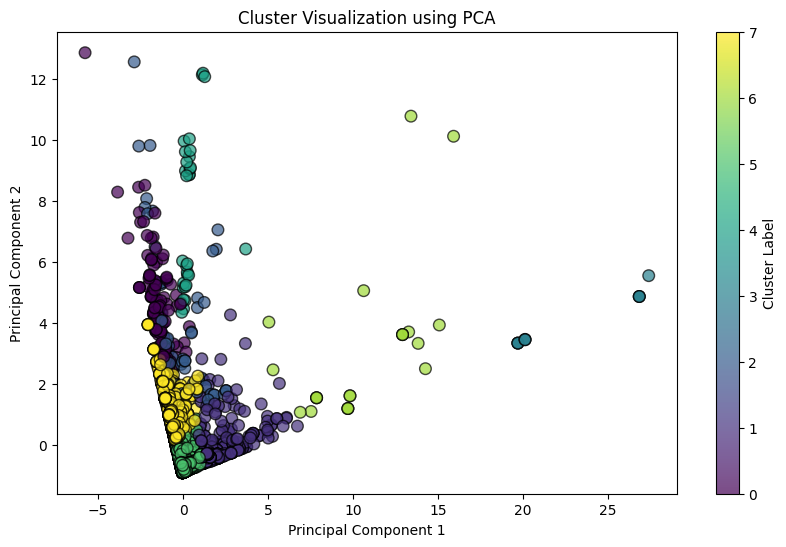

In [17]:
# Assuming 'clusters' contains the cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Product cluster based on Buying Patterns

In [18]:
# Creating an order-product matrix
order_product_matrix = pd.pivot_table(item_data, index='OrderiD', columns='Item_Id', aggfunc='size', fill_value=0)
order_product_matrix

Item_Id,1,2,3,4,5,6,7,8,9,10,...,46691,46692,46694,46695,46696,46697,46698,46699,46700,46701
OrderiD,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7529,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [19]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'df' is your DataFrame and each row represents an order

# Transform data into a list of transactions
transactions = item_data.groupby('OrderiD')['Item_Id'].apply(list).tolist()

# Encode transactions into a matrix format suitable for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
trans_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [20]:
from mlxtend.frequent_patterns import apriori

# Find frequent item sets using Apriori
frequent_itemsets = apriori(trans_encoded, min_support=0.005, use_colnames=True)


In [22]:
from mlxtend.frequent_patterns import association_rules

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

  antecedents consequents  antecedent support  consequent support   support  \
0      (1768)      (1769)            0.007463            0.006633  0.006219   
1      (1769)      (1768)            0.006633            0.007463  0.006219   
2      (2276)      (2278)            0.012023            0.008292  0.007877   
3      (2278)      (2276)            0.008292            0.012023  0.007877   
4      (2276)      (2279)            0.012023            0.008292  0.007463   

   confidence        lift  leverage  conviction  zhangs_metric  
0    0.833333  125.625000  0.006169    5.960199       0.999499  
1    0.937500  125.625000  0.006169   15.880597       0.998664  
2    0.655172   79.013793  0.007778    2.875954       0.999359  
3    0.950000   79.013793  0.007778   19.759536       0.995599  
4    0.620690   74.855172  0.007363    2.614503       0.998648  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1768),(1769),0.007463,0.006633,0.006219,0.833333,125.625000,0.006169,5.960199,0.999499
1,(1769),(1768),0.006633,0.007463,0.006219,0.937500,125.625000,0.006169,15.880597,0.998664
2,(2276),(2278),0.012023,0.008292,0.007877,0.655172,79.013793,0.007778,2.875954,0.999359
3,(2278),(2276),0.008292,0.012023,0.007877,0.950000,79.013793,0.007778,19.759536,0.995599
4,(2276),(2279),0.012023,0.008292,0.007463,0.620690,74.855172,0.007363,2.614503,0.998648
...,...,...,...,...,...,...,...,...,...,...
323,(3023),"(3024, 3025, 3026, 3027)",0.008706,0.005390,0.005390,0.619048,114.857143,0.005343,2.610852,1.000000
324,(3024),"(3025, 3026, 3027, 3023)",0.008706,0.005390,0.005390,0.619048,114.857143,0.005343,2.610852,1.000000
325,(3025),"(3024, 3026, 3027, 3023)",0.008292,0.005804,0.005390,0.650000,111.985714,0.005342,2.840559,0.999357
326,(3026),"(3024, 3025, 3027, 3023)",0.009536,0.005804,0.005390,0.565217,97.378882,0.005334,2.286650,0.999259


In [196]:
grouped_data = item_data.groupby('Item_Id')['OrderiD'].apply(set)

In [192]:
grouped_data_order = item_data.groupby('OrderiD')['Item_Id'].apply(set)

In [194]:
grouped_data_order

OrderiD
1       {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2       {778, 779, 780, 781, 782, 783, 784, 785, 786, ...
3                                            {2674, 1167}
4       {3, 4, 5, 6, 138, 14, 19, 21, 24, 27, 34, 40, ...
5           {772, 773, 774, 1767, 1768, 1769, 1770, 1771}
                              ...                        
7527                                         {3992, 3987}
7528                                               {3988}
7529    {44865, 44867, 46661, 46667, 46669, 46671, 466...
7532    {36812, 36813, 36814, 36815, 36816, 36817, 368...
7548                                              {15721}
Name: Item_Id, Length: 2412, dtype: object

In [200]:
grouped_data

Item_Id
1           {1}
2           {1}
3        {1, 4}
4        {1, 4}
5        {1, 4}
          ...  
46697    {7529}
46698    {7529}
46699    {7529}
46700    {7529}
46701    {7529}
Name: OrderiD, Length: 5875, dtype: object

In [197]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Assuming your 'item_data' DataFrame has a column 'Categories' with lists of categories

# Using MultiLabelBinarizer to transform the Categories into a binary format
mlb = MultiLabelBinarizer()
binary_categories = mlb.fit_transform(grouped_data)

# Creating a DataFrame for the binary categories
binary_categories_df = pd.DataFrame(binary_categories, columns=mlb.classes_, index=grouped_data.index)

# Now 'binary_categories_df' contains the binary representation of the categories
print(binary_categories_df.head())

         1     2     3     4     5     6     7     8     9     10    ...  \
Item_Id                                                              ...   
1           1     0     0     0     0     0     0     0     0     0  ...   
2           1     0     0     0     0     0     0     0     0     0  ...   
3           1     0     0     1     0     0     0     0     0     0  ...   
4           1     0     0     1     0     0     0     0     0     0  ...   
5           1     0     0     1     0     0     0     0     0     0  ...   

         7522  7523  7524  7525  7526  7527  7528  7529  7532  7548  
Item_Id                                                              
1           0     0     0     0     0     0     0     0     0     0  
2           0     0     0     0     0     0     0     0     0     0  
3           0     0     0     0     0     0     0     0     0     0  
4           0     0     0     0     0     0     0     0     0     0  
5           0     0     0     0     0     0    

In [193]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Assuming your 'item_data' DataFrame has a column 'Categories' with lists of categories

# Using MultiLabelBinarizer to transform the Categories into a binary format
mlb = MultiLabelBinarizer()
binary_categories = mlb.fit_transform(grouped_data_order)

# Creating a DataFrame for the binary categories
binary_categories_df = pd.DataFrame(binary_categories, columns=mlb.classes_, index=grouped_data_order.index)

# Now 'binary_categories_df' contains the binary representation of the categories
print(binary_categories_df.head())

         1      2      3      4      5      6      7      8      9      10     \
OrderiD                                                                         
1            1      1      1      1      1      1      1      1      1      1   
2            0      0      0      0      0      0      0      0      0      0   
3            0      0      0      0      0      0      0      0      0      0   
4            0      0      1      1      1      1      0      0      0      0   
5            0      0      0      0      0      0      0      0      0      0   

         ...  46691  46692  46694  46695  46696  46697  46698  46699  46700  \
OrderiD  ...                                                                  
1        ...      0      0      0      0      0      0      0      0      0   
2        ...      0      0      0      0      0      0      0      0      0   
3        ...      0      0      0      0      0      0      0      0      0   
4        ...      0      0      0    

In [174]:
len(item_data['OrderiD'].value_counts())

2412

In [162]:
binary_categories_df[binary_categories_df['Item_Id'] == 3]

,Item_Id,1,2,3,4,5,6,7,8,9,...,7522,7523,7524,7525,7526,7527,7528,7529,7532,7548
2,3,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
new_df = binary_categories_df[binary_categories_df['Item_Id'] == 3].T

In [171]:
new_df[new_df[2] != 0]

,index,2
0,Item_Id,3
1,1,1
4,4,1


In [172]:
item_data[item_data['Item_Id'] == 3]['OrderiD']

24    1
89    4
Name: OrderiD, dtype: int64

In [132]:
binary_categories_df = binary_categories_df.reset_index()

In [133]:
binary_categories_df

,Item_Id,1,2,3,4,5,6,7,8,9,...,7522,7523,7524,7525,7526,7527,7528,7529,7532,7548
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,46697,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5871,46698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5872,46699,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5873,46700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
binary_categories_df.columns = [str(x) for x in binary_categories_df.columns]

In [144]:
type(binary_categories_df.columns[1])

str

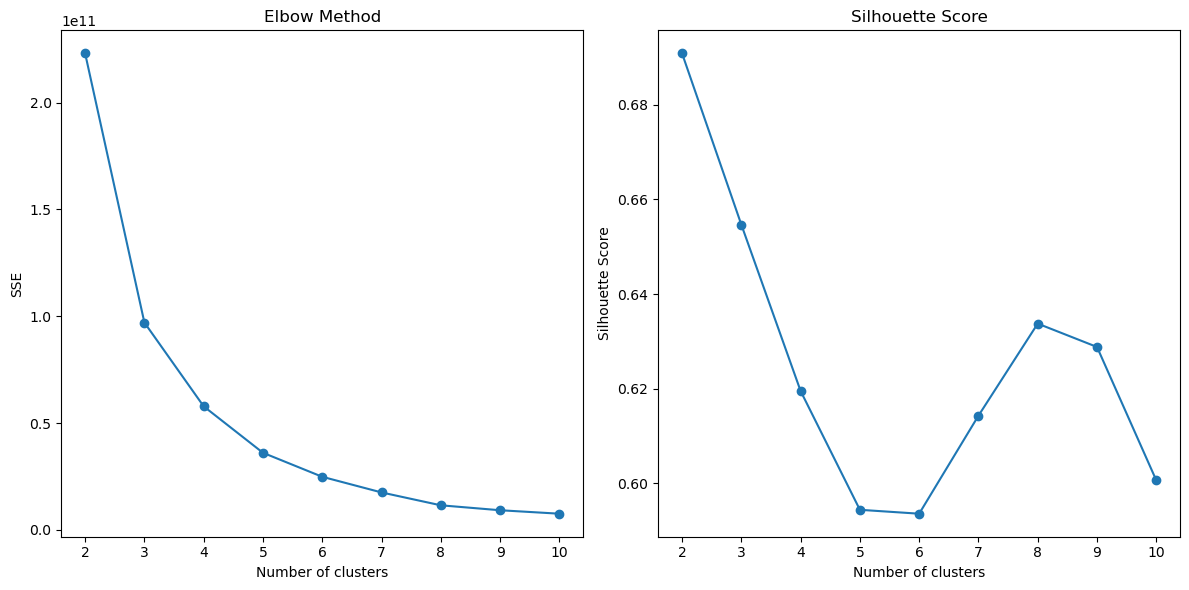

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'binary_categories_df' is your DataFrame from MultiLabelBinarizer

sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(binary_categories_df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(binary_categories_df, kmeans.labels_))

plt.figure(figsize=(12, 6))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


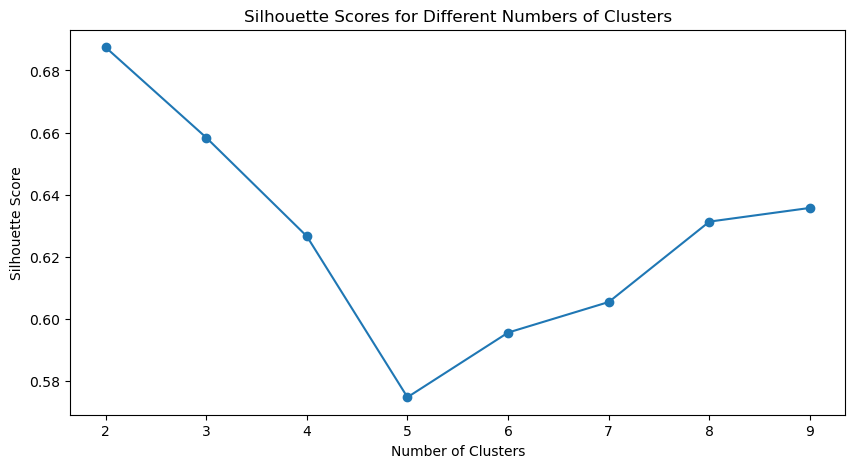

Optimal number of clusters are 2


In [146]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Agglomerative Clustering with a range of cluster numbers to find the optimal number
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(binary_categories_df)
    silhouette_avg = silhouette_score(binary_categories_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette Scores for different numbers of clusters
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Choose the optimal number of clusters
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters are {optimal_n_clusters}")

In [183]:
left_join_data = item_data.join(other=binary_categories_df,on=['Item_Id'],how='left', lsuffix='orignal')

In [ ]:
left_join_data['item']

In [186]:
items_in_cluster = left_join_data.groupby('kmeans_cluster')['ITEM_NAME'].apply(set)

In [187]:
items_in_cluster[0]

{'DOUBLE BACK', 'DURRY', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'KNOTTED'}

In [190]:
item_data

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,7532,36816,P-5,USA,P-5USA,51,80.00,51.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC
13131,7532,36815,P-5,USA,P-5USA,41,40.00,41.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC
13132,7532,36817,P-5,USA,P-5USA,23,108.00,23.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC
13133,7532,36812,P-5,USA,P-5USA,22,140.00,22.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC


In [189]:
for i in range(len(items_in_cluster)):
  print(f"Items in {i} cluster are - {items_in_cluster[i]}")

Items in 0 cluster are - {'DOUBLE BACK', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'DURRY', 'KNOTTED'}
Items in 1 cluster are - {'DOUBLE BACK', 'HANDLOOM', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'GUN TUFTED', 'DURRY', 'KNOTTED'}
Items in 2 cluster are - {'DOUBLE BACK', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'GUN TUFTED', 'DURRY', 'KNOTTED'}
Items in 3 cluster are - {'-', 'DOUBLE BACK', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'DURRY', 'KNOTTED'}
Items in 4 cluster are - {'-', 'DOUBLE BACK', 'HAND TUFTED', 'HANDLOOM', 'HANDWOVEN', 'GUN TUFTED', 'DURRY', 'KNOTTED'}
Items in 5 cluster are - {'-', 'DOUBLE BACK', 'HANDLOOM', 'HANDWOVEN', 'HAND TUFTED', 'JACQUARD', 'INDO-TIBBETAN', 'DURRY', 'KNOTTED'}
Items in 6 cluster are - {'HAND TUFTED', 'HANDWOVEN', 'DOUBLE BACK', 'HANDLOOM', 'JACQUARD', 'GUN TUFTED', 'INDO-TIBBETAN', 'DURRY', 'KNOTTED'}
Items in 7 cluster are - {'DOUBLE BACK', 'HAND TUFTED', 'HANDWOVEN', 'JACQUARD', 'DURRY'}


In [181]:
binary_categories_df[binary_categories_df['kmeans_cluster'] == 7]

,Item_Id,1,2,3,4,5,6,7,8,9,...,7523,7524,7525,7526,7527,7528,7529,7532,7548,kmeans_cluster
5492,40391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5493,40394,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5494,40443,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5495,40484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5496,40485,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,46697,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
5871,46698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
5872,46699,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
5873,46700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7


In [177]:
# Applying Agglomerative Clustering with the optimal number of clusters
kmeans_cluster_final = KMeans(n_clusters=8, random_state=42)
binary_categories_df['kmeans_cluster'] = kmeans_cluster_final.fit_predict(binary_categories_df)

# Checking the count of customers in each cluster
cluster_counts = binary_categories_df['kmeans_cluster'].value_counts().sort_index()

# # Analyzing each cluster
# cluster_analysis = binary_categories_df.groupby('kmeans_cluster').agg({
#     '0': ['mean', 'min', 'max'],
#     '1': ['mean', 'min', 'max', 'count']
# }).reset_index()

cluster_counts

kmeans_cluster
0     530
1     682
2     526
3    1456
4     580
5     768
6     950
7     383
Name: count, dtype: int64

In [120]:
# Applying Agglomerative Clustering with the optimal number of clusters
agglo_cluster_final = AgglomerativeClustering(n_clusters=6)
binary_categories_df['agglomerative_cluster'] = agglo_cluster_final.fit_predict(binary_categories_df)

# Checking the count of customers in each cluster
cluster_counts = binary_categories_df['agglomerative_cluster'].value_counts().sort_index()

# Analyzing each cluster
cluster_analysis = binary_categories_df.groupby('agglomerative_cluster').agg({
    '0': ['mean', 'min', 'max'],
    '1': ['mean', 'min', 'max', 'count']
}).reset_index()

cluster_analysis, cluster_counts

(  agglomerative_cluster         0                 1              
                              mean min max      mean min max count
 0                     0  0.200065   0   1  0.378264   0   1  3064
 1                     1  0.264609   0   1  0.270673   0   1  1814
 2                     2  0.210024   0   1  0.291965   0   1  1257
 3                     3  0.321603   0   1  0.479961   0   1  1023
 4                     4  0.193901   0   1  0.393901   0   1  4755
 5                     5  0.317772   0   1  0.330876   0   1  1221,
 agglomerative_cluster
 0    3064
 1    1814
 2    1257
 3    1023
 4    4755
 5    1221
 Name: count, dtype: int64)

In [117]:
len(item_data['Item_Id'].value_counts())

5875

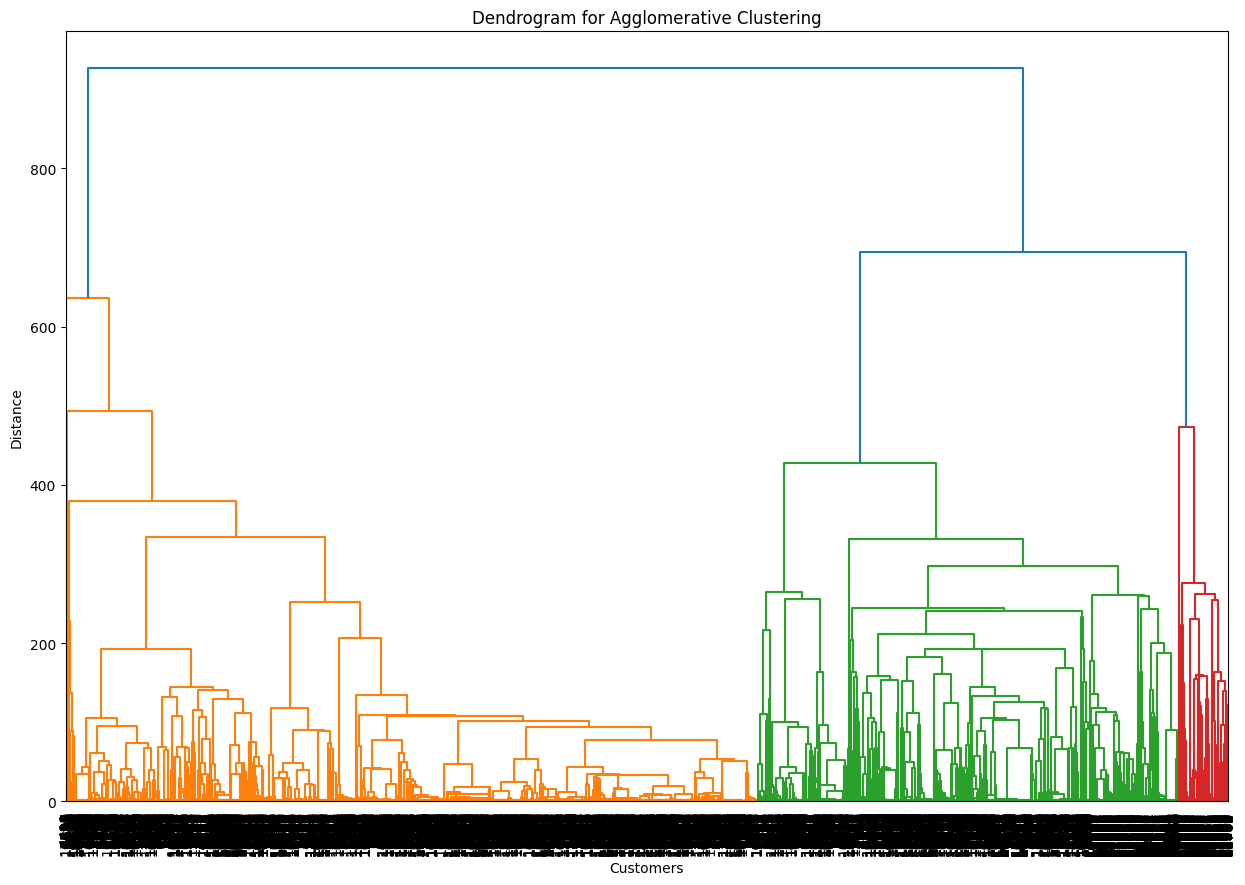

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Creating the linkage matrix for agglomerative clustering
Z = linkage(binary_categories_df)

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [101]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN

In [198]:
hdbscan = HDBSCAN(min_cluster_size=2)
binary_categories_df['hdbscan_cluster'] = hdbscan.fit_predict(binary_categories_df)

# Checking the count of customers in each cluster
cluster_counts = binary_categories_df['hdbscan_cluster'].value_counts().sort_index()

# # Descriptive statistics for each cluster
# cluster_description = binary_categories_df.groupby('hdbscan_cluster').agg({
#     '0': ['mean', 'median', 'min', 'max'],
#     '1': ['mean', 'median', 'min', 'max']
# })

cluster_counts

hdbscan_cluster
-1      809
 0        3
 1        4
 2        2
 3        2
       ... 
 863     28
 864      2
 865      9
 866      2
 867     10
Name: count, Length: 869, dtype: int64

In [199]:
binary_categories_df[binary_categories_df['hdbscan_cluster'] == 0]

,1,2,3,4,5,6,7,8,9,10,...,7523,7524,7525,7526,7527,7528,7529,7532,7548,hdbscan_cluster
Item_Id,,,,,,,,,,,,,,,,,,,,,
3539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
grouped_data_df = pd.DataFrame({'Item_Id':grouped_data.index, 'orders':grouped_data.values})

In [208]:
grouped_data_df[(grouped_data_df['Item_Id'] == 3539) | (grouped_data_df['Item_Id'] == 3541) | (grouped_data_df['Item_Id'] == 3542)]

,Item_Id,orders
1160,3539,"{1924, 905, 2191, 2194, 3609, 3610, 3105, 3106..."
1161,3541,"{1924, 905, 2191, 2194, 3609, 3610, 3105, 3106..."
1162,3542,"{1924, 905, 2191, 2194, 3609, 3610, 3105, 3106..."


In [214]:
cluster_counts_df = pd.DataFrame({'cluster_id':cluster_counts.index, 'items':cluster_counts.values})

In [217]:
cluster_counts_df[cluster_counts_df['cluster_id'] != -1 ]['items'].describe()

count    868.000000
mean       5.836406
std        7.648022
min        2.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       76.000000
Name: items, dtype: float64